Plots: Campaign 8 control objects before/after PLD

Re-creating plots that I've lost the code for. These plots should show the campaign 8 control objects

In [55]:
from agn_everest.analysis import *
import seaborn as sns
import richardsplot

In [56]:
path = "object_lists/c8_control/"

df = pd.read_csv(path+"K2Campaign8_PSDslopes_GO8012-targets.csv.csv", skipinitialspace=False)

In [57]:
GOs = ['GO8012', 'GO8042', 'GO8077', 'GO8051']
colors = ['#3498db', '#e67e22', '#27ae60', '#e74c3c' ]

/home/rachel/anaconda2/envs/py3/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


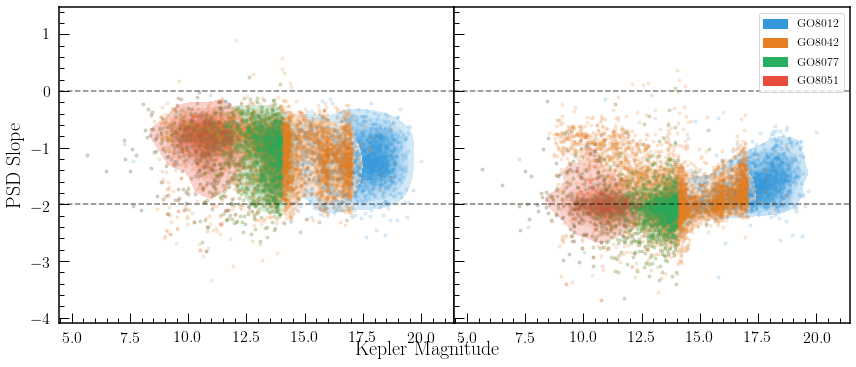

In [58]:
fig,ax = plt.subplots(1,2, figsize=(12,5), sharey=True, gridspec_kw = {'wspace':0, 'hspace':0})

for GO, c in zip(GOs, colors):
    df = pd.read_csv(path+"K2Campaign8_PSDslopes_%s-targets.csv.csv"%GO, skipinitialspace=False)
    
    # Before PLD
    mask = (df['magnitude']!=' ')
    mags = np.array(df['magnitude'][mask]).astype(float)
    slope = np.array(df['PSD_m_raw_above_noise'][mask])
    mask2 = ~np.isnan(slope)

    mags = mags[mask2]
    slope = slope[mask2]

    ax[0].plot(mags, slope,'.', color=c, alpha = 0.15)#, label=GO)
    sns.kdeplot(mags, slope, color=c, shade_lowest=False, shade=True, label=GO, ax=ax[0])
    
    # After PLD
    mask = (df['magnitude']!=' ')
    mags = np.array(df['magnitude'][mask]).astype(float)
    slope = np.array(df['PSD_m_cor_above_noise'][mask])
    mask2 = ~np.isnan(slope)

    mags = mags[mask2]
    slope = slope[mask2]
    ax[1].plot(mags, slope,'.', color=c, alpha = 0.15)#, label=GO)
    sns.kdeplot(mags, slope, color=c, shade_lowest=False, shade=True, label=GO, ax=ax[1])

ax[0].plot(ax[0].get_xlim(), np.zeros(2), 'k--', alpha=0.5)
ax[0].plot(ax[0].get_xlim(), np.zeros(2)-2, 'k--', alpha=0.5)

ax[1].plot(ax[1].get_xlim(), np.zeros(2), 'k--', alpha=0.5)
ax[1].plot(ax[1].get_xlim(), np.zeros(2)-2, 'k--', alpha=0.5)

ax[0].set_ylabel("PSD Slope", fontsize=20)
#ax[0].legend()
#ax[1].set_ylabel("PSD Slope", fontsize=20)
#ax[1].set_xlabel("Kepler Magnitude", fontsize=20)
fig.text(0.5, 0.0, 'Kepler Magnitude', fontsize=20,ha='center')
ax[1].legend()
plt.tight_layout()
plt.savefig("submit/Plots/C8_control_PLD.pdf")

/home/rachel/anaconda2/envs/py3/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


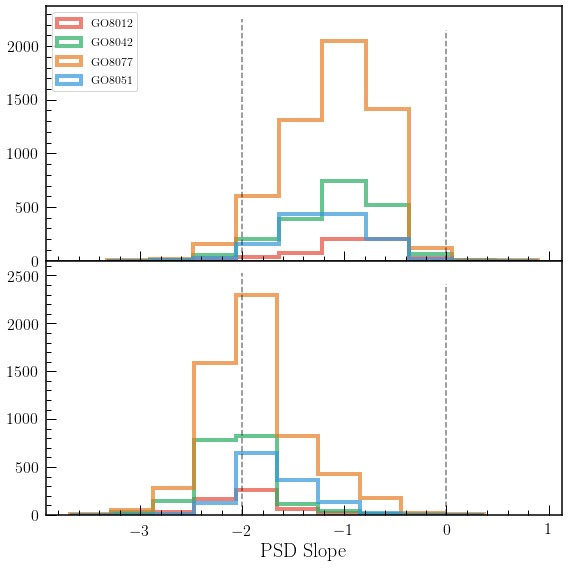

In [59]:
fig,ax = plt.subplots(2,1, figsize=(8,8), sharex=True, gridspec_kw = {'wspace':0, 'hspace':0})

m_list_raw = []
m_list_cor = []

# make histogram (of same thing I guess)
for GO, c in zip(GOs, colors):
    df = pd.read_csv(path+"K2Campaign8_PSDslopes_%s-targets.csv.csv"%GO, skipinitialspace=False)
    
    # Before PLD
    mask = (df['magnitude']!=' ')
    mags = np.array(df['magnitude'][mask]).astype(float)
    slope = np.array(df['PSD_m_raw_above_noise'][mask])
    mask2 = ~np.isnan(slope)

    m_list_raw.append(slope[mask2])
    
    
    # After PLD
    mask = (df['magnitude']!=' ')
    mags = np.array(df['magnitude'][mask]).astype(float)
    slope = np.array(df['PSD_m_cor_above_noise'][mask])
    mask2 = ~np.isnan(slope)

    m_list_cor.append(slope[mask2])
    


ax[0].hist(m_list_raw , color=colors, histtype=u'step', linewidth=4, alpha=0.7)
ax[1].hist(m_list_cor , color=colors, histtype=u'step', linewidth=4, alpha=0.7)

ax[0].legend(GOs, loc='upper left')
ax[0].plot(np.zeros(2), ax[0].get_ylim(), 'k--', alpha=0.5)
ax[0].plot(np.zeros(2)-2, ax[0].get_ylim(), 'k--', alpha=0.5)
ax[1].plot(np.zeros(2), ax[1].get_ylim(), 'k--', alpha=0.5)
ax[1].plot(np.zeros(2)-2, ax[1].get_ylim(), 'k--', alpha=0.5)
ax[1].set_xlabel('PSD Slope', fontsize=20)

plt.tight_layout()
plt.savefig("submit/Plots/C8_control_PLD_hist.pdf")

---
Creating plot showing what can happen to a periodic object after PLD (doesn't happen to all of them)

In [60]:
epic=220182448
#epic = 220232812
campaign=8
#time = np.arange(3853)/48.0# time in days since start of campaign

INFO  [everest.user.DownloadFile()]: Found cached file.
INFO  [everest.user.load_fits()]: Loading FITS file for 220182448.


/home/rachel/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


CPU times: user 1.35 s, sys: 4 µs, total: 1.35 s
Wall time: 1.35 s


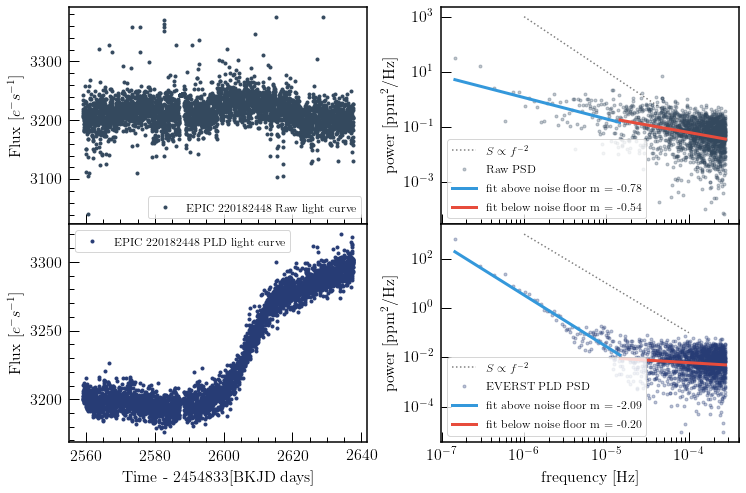

In [80]:
%%time
# plotting
fig,ax = plt.subplots(2,2, figsize=(12,8), sharex='col', gridspec_kw = {'wspace':0.25,'hspace':0})
# 
fake_omega = np.logspace(-6, -4, base=10)
fake_pow = fake_omega**(-2) / 1e9
ax[0,1].plot(fake_omega, fake_pow, ':', color='gray', label='$S \propto f^{-2}$', linewidth=1.5)
ax[1,1].plot(fake_omega, fake_pow, ':', color='gray', label='$S \propto f^{-2}$', linewidth=1.5)


# ----------------------------RAW------------------------------
lc_everest = everest.Everest(epic, season=campaign, mission='k2')
time = lc_everest.time.copy()
lc_raw = lc_everest.fraw.copy()


# interpolate bad cadences
cadno =  np.arange(len(lc_everest.time))
mask = (np.isin(cadno, np.concatenate([lc_everest.nanmask, lc_everest.badmask, lc_everest.mask])))

interped_vals = np.interp(cadno[mask], cadno[~mask], lc_raw[~mask])
# replace spurious cadence values with the interpolated values
lc_raw[mask] = interped_vals

# calculate PSD slopes
freq_raw, power_raw = LS_PSD(time*86400, lc_raw, f = k2_freq)

noise_floor_days = 5
# noise floor are freqencies > X days, convert to Hz
noise_floor_mask = freq_raw>(2*np.pi/(noise_floor_days*86400))

m_raw, b_raw = np.polyfit(np.log10(freq_raw)[~noise_floor_mask], np.log10(power_raw)[~noise_floor_mask], 1)
m_rnoise, b_rnoise = np.polyfit(np.log10(freq_raw)[noise_floor_mask], np.log10(power_raw)[noise_floor_mask], 1)

f,power = LS_PSD(time*86400,lc_raw, f=k2_freq)

ax[0,0].plot(time,lc_raw, marker='.', ls='', label="EPIC %s Raw light curve"%epic, color='#34495e')
#ax[0,0].set_xlabel("Time - 2454833[BKJD days]")
ax[0,0].set_ylabel("Flux [$e^-s^{-1}$]")
ax[0,0].legend()

ax[0,1].plot(f,power, label="Raw PSD", marker='.', ls='', alpha=0.3, color='#34495e')
#ax[0,1].set_xlabel("frequency [Hz]")
ax[0,1].set_ylabel("power [$\mathrm{ppm}^2/\mathrm{Hz}$]")
ax[0,1].set_yscale("log")
ax[0,1].set_xscale("log")

ax[0,1].plot(freq_raw[~noise_floor_mask], 10**(np.log10(freq_raw[~noise_floor_mask])*m_raw+b_raw), 
             label="fit above noise floor m = %.2f"%m_raw, linewidth=3, alpha = 1, color='#3498db')
ax[0,1].plot(freq_raw[noise_floor_mask], 10**(np.log10(freq_raw[noise_floor_mask])*m_rnoise+b_rnoise), 
             label="fit below noise floor m = %.2f"%m_rnoise, linewidth=3, alpha = 1, color='#e74c3c')
ax[0,1].legend(loc='lower left')

# -----------------------EVEREST Corrected (2 CBVs)------------------------
tcorr, fcorr = lc_everest.time.copy(), lc_everest.flux.copy()


interped_vals = np.interp(cadno[mask], cadno[~mask], fcorr[~mask])
# replace spurious cadence values with the interpolated values
fcorr[mask] = interped_vals

f,power = LS_PSD(tcorr*86400,fcorr, f=k2_freq)

# calculate PSD slopes
freq_corr, power_corr = LS_PSD(tcorr*86400, fcorr, f = k2_freq)

noise_floor_days = 5
# noise floor are freqencies > X days, convert to Hz
noise_floor_mask = freq_corr>(2*np.pi/(noise_floor_days*86400))

m, b = np.polyfit(np.log10(freq_corr)[~noise_floor_mask], np.log10(power_corr)[~noise_floor_mask], 1)
m_noise, b_noise = np.polyfit(np.log10(freq_corr)[noise_floor_mask], np.log10(power_corr)[noise_floor_mask], 1)



ax[1,0].plot(tcorr, fcorr, marker='.', ls='', label="EPIC %s PLD light curve"%epic, color='#273c75')
ax[1,0].set_xlabel("Time - 2454833[BKJD days]")
ax[1,0].set_ylabel("Flux [$e^-s^{-1}$]")
ax[1,0].legend()

ax[1,1].plot(f,power, label="EVERST PLD PSD", marker='.', ls='', alpha=0.3, color='#273c75')
ax[1,1].set_xlabel("frequency [Hz]")
ax[1,1].set_ylabel("power [$\mathrm{ppm}^2/\mathrm{Hz}$]")
ax[1,1].set_yscale("log")
ax[1,1].set_xscale("log")

ax[1,1].plot(freq_raw[~noise_floor_mask], 10**(np.log10(freq_raw[~noise_floor_mask])*m+b), 
             label="fit above noise floor m = %.2f"%m, linewidth=3, alpha = 1, color='#3498db')
ax[1,1].plot(freq_raw[noise_floor_mask], 10**(np.log10(freq_raw[noise_floor_mask])*m_noise+b_noise), 
             label="fit below noise floor m = %.2f"%m_noise, linewidth=3, alpha = 1, color='#e74c3c')
ax[1,1].legend(loc='lower left')


plt.tight_layout()
plt.savefig("./submit/Plots/K2C8_PLD_Control_%s.pdf"%epic)